#HW2 - Ceslee Montgomery

##Preliminaries

In [54]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn import datasets, neighbors
from sklearn.preprocessing import scale

from sklearn.cross_validation import train_test_split

##1. Implement KNN classification, using the sklearn package. 

*We learned how to do this in class.*
See also: http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

###BACKGROUND

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: **it does not attempt to construct a general internal model, but simply stores instances of the training data.** Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

###STEP 1: EXPLORE DATA

In [28]:
#0. GET DATA: Load Data+Target, Scale Dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(scale(iris.data), columns=iris.feature_names)
iris_df['Target'] = iris.target
#0. EXPLORE DATA: Check Your Work -- info(), describe(), Target.unique()
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [30]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,0.000000
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,0.000000
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,1.000000
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,2.000000
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,2.000000


In [37]:
print "label set: " + repr(iris_df['Target'].unique())

label set: array([0, 1, 2])


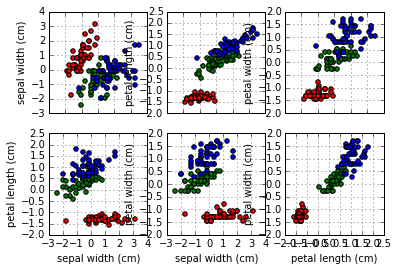

In [50]:
#0. VIZ DATA: Plot 2x3 of Figures
fig, axes = plt.subplots(nrows=2, ncols=3)
colors = ['r','g','b']

for i in range(3):
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=0, y=1, kind='scatter', c=colors[i], ax=axes[0,0])
    
for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=0,y=2, kind='scatter', c=colors[i], ax=axes[0,1])

for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=0,y=3, kind='scatter', c=colors[i], ax=axes[0,2])
    
for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=1,y=2, kind='scatter', c=colors[i], ax=axes[1,0])

for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=1,y=3, kind='scatter', c=colors[i], ax=axes[1,1])

for i in range(3): 
    tmp = iris_df[iris_df.Target == i]
    tmp.plot(x=2,y=3, kind='scatter', c=colors[i], ax=axes[1,2])

###STEP 2: BUILD MODEL + PARAMETER SEARCH

In [53]:
#0. SPLIT SET: TRAINING vs TEST SETS
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)


In [4]:
#1. VARY K: Examine Performance of Diff K Values
n_neighbors = range(1,61, 2)
print n_neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]


In [55]:
#1. GET SCORES: Loop through k values
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

###STEP 3: CROSS-VALIDATION

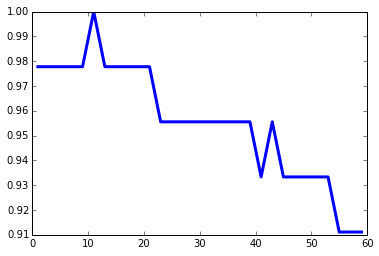

In [60]:
#2. VERIFY SCORES: VIZ SCORES
plt.plot(n_neighbors, scores, linewidth=3.0)

k=11 appears to yield best accuracy

In [61]:
#2. VERIFY SCORES: CROSS VALIDATION ANALYSIS
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(15, weights='uniform')
clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

In [67]:
print "Scores: {}".format(scores)
print "Mean: {}".format(scores.mean())

Scores: [ 0.93333333  1.          0.93333333  0.96666667  1.        ]
Mean: 0.966666666667


###STEP 4: VISUALIZE OUTPUT